In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pwd

'/Users/raphaelvoortman/code/caronarthur/speech_emotion_reco/notebooks'

In [10]:
data = pd.read_csv('../speech_emotion_reco/data/iemocap_full_dataset.csv')

In [84]:
# preview of data
data.head()

,session,method,gender,emotion,n_annotators,agreement,path
0,1,script,F,neu,3,3,Session1/sentences/wav/Ses01F_script02_1/Ses01...
1,1,script,F,fru,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...
2,1,script,F,xxx,0,0,Session1/sentences/wav/Ses01F_script02_1/Ses01...
3,1,script,F,sur,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...
4,1,script,F,neu,3,2,Session1/sentences/wav/Ses01F_script02_1/Ses01...


In [25]:
# 10.039 observations
data.shape 

(10039, 7)

In [29]:
# 9 emotions + 2 unknown ('oth','xxx')
data.emotion.nunique() 

11

In [101]:
emotions = data.groupby('emotion').count()['path'].sort_values(ascending=False)

In [110]:
# mapping between emotions and values
emotion_dict = {"unknown": "xxx",
                "frustration": "fru",
                "neutral": "neu",
                "anger": "ang",
                "sadness": "sad",
                "excitement": "exc",
                "hapiness": "hap",
                "surprise": "sur",
                "fear": "fea",
                "other": "oth",
                "disgust": "dis"}

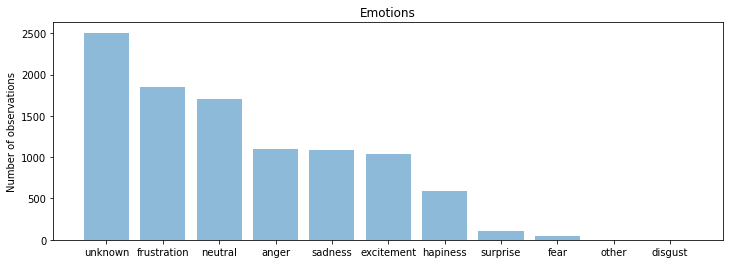

In [111]:
# distribution by emotion
plt.figure(figsize=(12, 4))
plt.bar(emotion_dict.keys(), emotions.values, align='center', alpha=0.5)
plt.ylabel('Number of observations')
plt.title('Emotions')
plt.show()

In [87]:
# dialogue sessions in the database
data.session.unique()

array([1, 2, 3, 4, 5])

In [89]:
data.gender.unique()

array(['F', 'M'], dtype=object)

In [99]:
data.groupby('gender').count()['path'].values

array([4941, 5098])

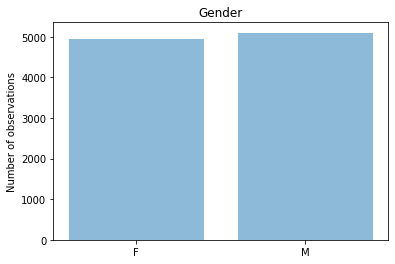

In [100]:
plt.bar(data.gender.unique(), data.groupby('gender').count()['path'].values, align='center', alpha=0.5)
plt.ylabel('Number of observations')
plt.title('Gender')
plt.show()

In [102]:
data['percentage_agreement'] = data.agreement / data.n_annotators

In [104]:
# there is atleast 50% agreement for all observations
data.percentage_agreement.value_counts()

0.666667    3864
1.000000    2166
0.750000     900
0.500000     602
Name: percentage_agreement, dtype: int64

In [106]:
# is null for all the unknown
data.percentage_agreement.isnull().sum()

2507

In [108]:
data.method.value_counts()

script    5255
impro     4784
Name: method, dtype: int64

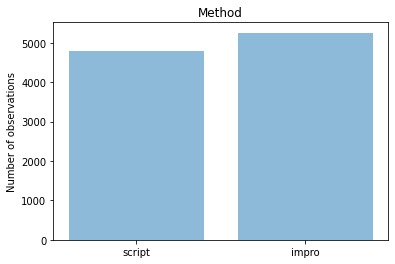

In [109]:
plt.bar(data.method.unique(), data.groupby('method').count()['path'].values, align='center', alpha=0.5)
plt.ylabel('Number of observations')
plt.title('Method')
plt.show()